In [1]:
# 14 Jun 2018
# notebook to process and plot scalar quantities

import matplotlib.pyplot as plt
from pyCDFTOOLS.process_scalar import scalar_to_txt, txt_to_array, read_vol_transport

In [2]:
# define the data directory to process

#data_dir = "/home/julian/data/NEMO_data/eORCA1-LIM3/default/"
data_dir = "/home/julian/data/NEMO_data/eORCA1-LIM3/EXP_GEOM_x100/OUTPUTS/"

In [7]:
# run this to process the NetCDF data, bypass if not required

#scalar_to_txt(data_dir, query = False)

mean_temp

array([4.08086824, 4.08053064, 4.08016777, ..., 4.03713226, 4.03679848,
       4.03643942])

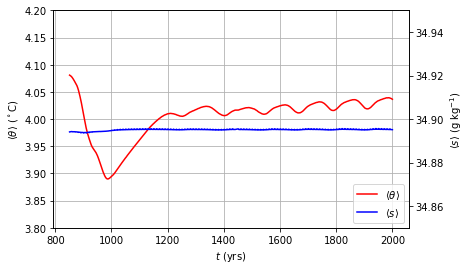

In [3]:
time, mean_temp = txt_to_array(data_dir, "sctemtot", query = False)
time, mean_saln = txt_to_array(data_dir, "scsaltot", query = False)

fig = plt.figure(figsize=(14, 4))

ax1 = plt.subplot(1, 2, 1)
line1 = plt.plot(time, mean_temp, 'r', label = r"$\left\langle\theta\right\rangle$")
plt.ylim(3.8, 4.2)
plt.ylabel(r"$\left\langle\theta\right\rangle$ (${}^\circ\mathrm{C}$)")

plt.xlabel(r"$t$ ($\mathrm{yrs}$)")
plt.grid()

ax2 = ax1.twinx()
line2 = plt.plot(time, mean_saln, 'b', label = r"$\left\langle s \right\rangle$")
plt.ylim(34.85, 34.95)
plt.ylabel(r"$\left\langle s \right\rangle$ ($\mathrm{g}\ \mathrm{kg}^{-1}$)")

lines = line1 + line2

plt.legend(handles = lines, loc=4)

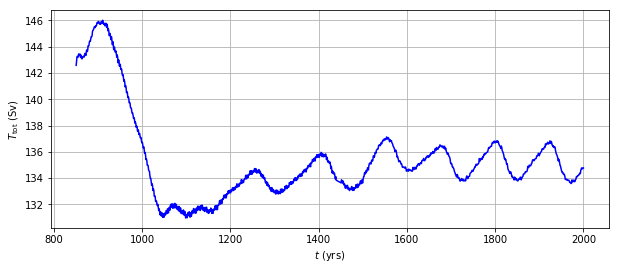

In [4]:
time, drake_transport = read_vol_transport(data_dir, "ACC_Drake_Passage")
#time, tas_transport = read_vol_transport(data_dir, "TAS")
#time, waus_transport = read_vol_transport(data_dir, "WAUS")
#time, nz_transport = read_vol_transport(data_dir, "NZ")
#time, lecap_transport = read_vol_transport(data_dir, "LeCap")

fig = plt.figure(figsize=(10, 4)) # dpi shouldn't matter for pdf outputs

plt.plot(time, drake_transport, 'b')
#plt.plot(time, tasman_transport, 'r')
#plt.plot(time, waus_transport, 'm')
#plt.plot(time, nz_transport, 'g')
#plt.plot(time, lecap_transport, 'k')
plt.xlabel(r"$t$ ($\mathrm{yrs}$)")
plt.ylabel(r"$T_{\mathrm{tot}}$ ($\mathrm{Sv}$)")
plt.grid()

#fig.savefig("transport_time_series.pdf", bbox_inches = "tight")

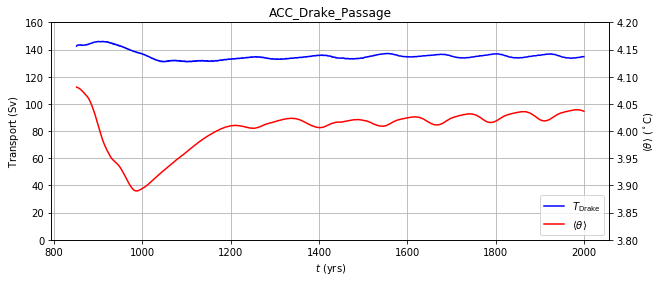

In [6]:
key_str = "ACC_Drake_Passage"
time, drake_transport = read_vol_transport(data_dir, key_str)

fig = plt.figure(figsize=(10, 4)) # dpi shouldn't matter for pdf outputs

ax1 = plt.axes()
line1 = plt.plot(time, drake_transport, 'b', label = r"$T_{\mathrm{Drake}}$")
plt.xlabel(r"$t$ ($\mathrm{yrs}$)")
plt.ylabel(r"Transport ($\mathrm{Sv}$)")
plt.ylim(0, 160)
plt.title(key_str)
plt.grid()

time, mean_temp = txt_to_array(data_dir, "sctemtot", query = False)

ax2 = ax1.twinx()
line2 = plt.plot(time, mean_temp, 'r', label = r"$\left\langle\theta\right\rangle$")
plt.ylim(3.8, 4.2)
plt.ylabel(r"$\left\langle\theta\right\rangle$ (${}^\circ\mathrm{C}$)")

lines = line1 + line2

plt.legend(handles = lines, loc=4)

fig.savefig("equilibration_diag.pdf", bbox_inches = "tight")

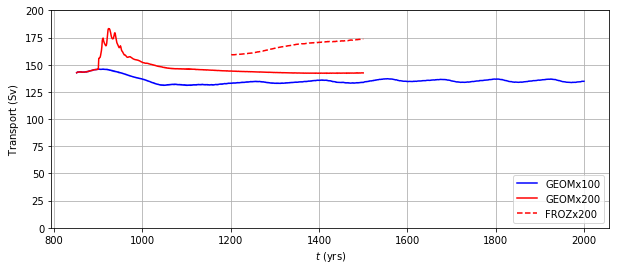

In [7]:
key_str = "ACC_Drake_Passage"
time, drake_transport = read_vol_transport(data_dir, key_str)

fig = plt.figure(figsize=(10, 4)) # dpi shouldn't matter for pdf outputs

ax1 = plt.axes()
line1 = plt.plot(time, drake_transport, 'b', label = r"GEOM_x100")
plt.xlabel(r"$t$ ($\mathrm{yrs}$)")
plt.ylabel(r"Transport ($\mathrm{Sv}$)")
plt.ylim(0, 200)
plt.grid()

time, drake_transport = read_vol_transport(data_dir.replace("GEOM_x100", "GEOM_x200"), key_str)
line2 = plt.plot(time, drake_transport, 'r', label = r"GEOM_x200")

time, drake_transport = read_vol_transport(data_dir.replace("GEOM_x100", "FROZ_x200"), key_str)
line3 = plt.plot(time, drake_transport, 'r--', label = r"FROZ_x200")

lines = line1 + line2 + line3
plt.legend(handles = lines, loc=4)

In [8]:
key_str = "ACC_Drake_Passage"
time, drake_transport = read_vol_transport(data_dir, key_str)
match = "GEOM"
for key in data_dir.split("/"):
    if match in key:
        exp_name = key.replace("EXP_", "")

In [19]:
match = "GEOM"
for key in data_dir.split("/"):
    if match in key:
        exp_name = key.replace("EXP_", "")
exp_name

'GEOM_x100'